# New Product Sales Methods Analysis


Six weeks ago, we launched a new line of office stationery. Despite the world becoming increasingly digital, there is still demand for notebooks, pens, and sticky notes. Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming.

We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two:

- Email: Customers in this group received an email when the product line was launched, and a further email three weeks later.     This required very little work for the team.

- Call: Customers in this group were called by a member of the sales team. On average, members of the team were on the phone     for around thirty minutes per customer.

- Email and Call: Customers in this group were first sent the product information email, then called a week later by the sales   team to talk about their needs and how this new product may support their work. The email required little work from the team,   and the call was around ten minutes per customer.

## Business Goals

Considering the launch of new products for office stationery needs, accompanied by changing customer purchasing methods, the sales strategy must also change. therefore, the sales team needs to ensure that the sales methods used are the best to sell the new product effectively.
The sales tim want to know the following insights: 
 - Differences in the number of customers based on each sales strategy approach
 - The distribution of revenue overall and for each method
 - Differences of revenue over time for each method
 - Based on the data, which method would you recommend we continue to use? Some
   of these methods take more time from the team so they may not be the best for us to use if the results are similar

## Data Validation

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the data and view first few rows
sales = pd.read_csv('product_sales.csv')
display(sales.head())

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# Display general information about the 'sales' dataset using the info() method.
print(sales.info())

print('\n')

# Display summary statistics for the 'sales' dataset using the describe() method.
display(sales.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None




,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [4]:
# check for the sum of the null values in the dataframe
sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [5]:
# Specify the column for missing values
column_to_check = 'revenue'

# Step 1: Count the number of missing values in the column
missing_values_count = sales[column_to_check].isnull().sum()

# Step 2: Calculate the threshold for missing values (5 percent)
total_rows = len(sales)
threshold = 0.05 * total_rows

# Step 3: Compare the count of missing values with the threshold
if missing_values_count <= threshold:
    # Step 4: If the count <= threshold, drop the rows with missing values
    sales.dropna(subset=[column_to_check], inplace=True)
    print(f"Dropped rows with missing '{column_to_check}' values due to excessive missing values.")
else:
    print(f"Mising values of the '{column_to_check}' column is greater than the threshold So the '{column_to_check}' column will not be dropped.")

Mising values of the 'revenue' column is greater than the threshold So the 'revenue' column will not be dropped.


In [6]:
# replace missing value in revenue column with median
sales['revenue'] = sales.revenue.fillna(sales['revenue'].median())

In [7]:
# Get the list of column names in the 'sales' dataset.
columns = sales.columns

# Iterate through each column in the dataset and print the unique values
for col in columns:
    unique_values = sales[col].unique()
    num_of_unique_values = sales[col].nunique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print(num_of_unique_values)
    print("\n")

Unique values in 'week':
[2 6 5 4 3 1]
6


Unique values in 'sales_method':
['Email' 'Email + Call' 'Call' 'em + call' 'email']
5


Unique values in 'customer_id':
['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
15000


Unique values in 'nb_sold':
[10 15 11  9 13  8 12  7 14 16]
10


Unique values in 'revenue':
[ 89.5  225.47  52.55 ...  44.34  45.01  64.9 ]
6743


Unique values in 'years_as_customer':
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
42


Unique values in 'nb_site_visits':
[24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]
27


Unique values in 'state':
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missour

In [8]:
# cleaning sales method 
sales['sales_method'] = sales['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

In [9]:
# Filter the DataFrame based on the condition 'years_as_customer' > 39
sales_out_of_range_rows = sales[sales['years_as_customer'] > 39]

# Print the 'years_as_customer' column with its name
display(sales_out_of_range_rows)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [10]:
# Filter the DataFrame to keep only rows where 'years_as_customer' <= 39
sales = sales[sales['years_as_customer'] <= 39]

# Now, the 'sales' DataFrame contains only rows where 'years_as_customer' is not greater than 39
sales_out_of_range_rows = sales[sales['years_as_customer'] > 39]
print(sales_out_of_range_rows)

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [11]:
# Check for duplicated rows
duplicates = sales.duplicated()

# Count the total number of duplicates
total_duplicates = duplicates.sum()

# Print the total number of duplicate rows
print(f"Total duplicates: {total_duplicates}")

# Check for columns with empty strings
columns_with_empty_strings = sales.columns[sales.applymap(lambda x: x == '').any()]

# Print the columns with empty strings
print('columns with empty strings are:', columns_with_empty_strings)
print('\n')

# Select numeric columns
numeric_cols = sales.select_dtypes(include=[np.number])

# Check if numeric columns contain negative values
contains_negative = (numeric_cols < 0).any().any()

if contains_negative:
    print("Numeric columns contain negative values.")
else:
    print("Numeric columns do not contain negative values.")
print('\n')

Total duplicates: 0
columns with empty strings are: Index([], dtype='object')


Numeric columns do not contain negative values.




In [12]:
# Change 'sales_method' data type to category
sales['sales_method'] = sales['sales_method'].astype('category')

# Display information of the dataframe and the sum of null values of each column
print(sales.info())
print('\n')
print(sales.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               14998 non-null  int64   
 1   sales_method       14998 non-null  category
 2   customer_id        14998 non-null  object  
 3   nb_sold            14998 non-null  int64   
 4   revenue            14998 non-null  float64 
 5   years_as_customer  14998 non-null  int64   
 6   nb_site_visits     14998 non-null  int64   
 7   state              14998 non-null  object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 952.2+ KB
None


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


### Data Validation Summary

- The dataset used for this analysis is product_sales.csv
- The number of observations is 15,000; the number of columns is 8.
- The 8 attributes are identified below.
- Variables were converted to their appropriate data type, where required, as follows:
  - `week` to integer
  - `sales_method` to factor
  - `customer_id` to character
  - `nb_sold` to integer
  - `revenue` to double, rounded to 2 d.p.
  - `years_as_customer` to integer
  - `nb_site_visits` to integer
  - `state` to factor
- After data type conversion, the data profile of the dataset was compared against the avaiable documentation for data validation, and the following observations were made and associated actions taken:
  - `week`
     - General Observations: 6 unique values, from week 1 to 6.
     - Missing Values: None
     - Action Taken: None
  - `sales_method`
     - General Observations: There are 5 unique values consisting of [Email, Call, Email + Call, em + call,        e-mail], but there should be 3 unique values only.
     - Missing Values: None
     - Action Taken: Categories are not standardized, and have been updated to align to consist of [Email,          Call, Email + Call] which corresponds to the description.
  - `customer_id`
     - General Observations: All values are unique, all values have a character length of 36, no whitespace.
     - Missing Values: None
     - Action Taken: None
  - `nb_sold`
     - General Observations: numeric values, varies between 7 and 16.
     - Missing Values: None
     - Action Taken: None
  - `revenue`
     - General Observations: numeric values, Varies between 32.54 and 238.32 
     - Missing Values: 1074 missing values (7% of total rows).
     - Action Taken: because the missing values is more than the 5% threshold. Then missing values are              filled with the median. 
  - `years_as_customer`
     - General Observations: numeric values, varies between 0 and 63; 63 corresponds to the Year 2023-63 =          1960; The max threshold should be 2023-1984 = 39; therefore, there are two rows of data that are more        than 39 (0.001% of total rows)
     - Missing Values: None
     - Action Taken: Drop two rows that have a value above 39.
  - `nb_site_visits`
     - General Observations: numeric values, varies between 12 and 41
     - Missing Values: None
     - Action Taken: None
  - `state`
     - General Observations: 50 unique values
     - Missing Values: None
     - Action Taken: None

After the data validation, the dataset contains 14998 rows and 8 columns without missing values.

## Exploratory Data Analysis

### a. How many customers were there for each approach?

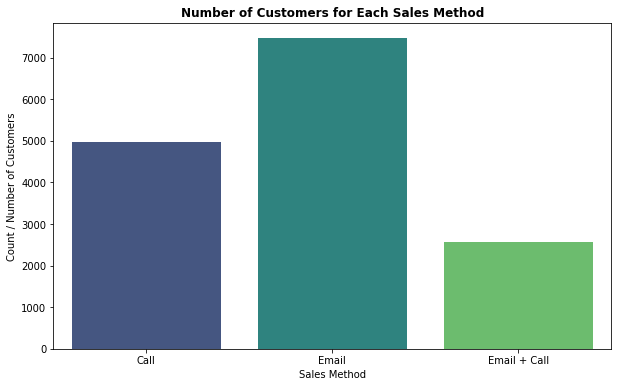

In [13]:
# number of customer gorup by sales method
customer_count_by_method = sales.groupby('sales_method')['customer_id'].nunique().reset_index()

# barchart the number of customer by sales method
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='customer_id', data=customer_count_by_method, palette='viridis')
plt.title('Number of Customers for Each Sales Method', fontweight='bold')
plt.xlabel('Sales Method')
plt.ylabel('Count / Number of Customers')
plt.show()

From the last 6 weeks record. When a new product was launched, the sales strategy was carried out by the sales team mostly used an email strategy. Followed by the call method and finally the combination method of the two.Also we can see that the email sales method is 3 times higher than the combination Email + Call method. And the call method is twice as large.

### b. What does the spread of the revenue look like overall? And for each method?

Text(0, 0.5, 'Count')

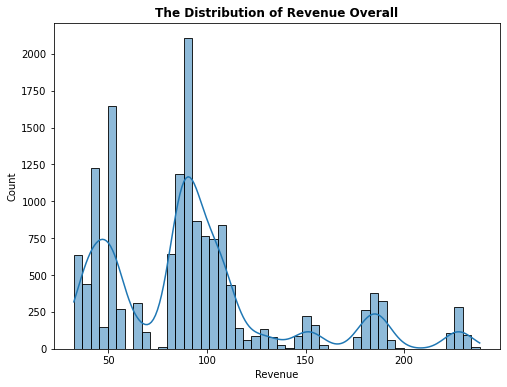

In [14]:
# Differences in revenue for each sales method approach - Revenue
plt.figure(figsize=(8, 6))
sns.histplot(data=sales, x='revenue', kde= True)
plt.title('The Distribution of Revenue Overall', fontweight='bold')
plt.xlabel('Revenue')
plt.ylabel('Count')

We can see the distribution of revenue generated through a histogram. The majority of revenue achieved in the last 6 weeks was less than 200. For revenue more than 200 , this could be considered an outlier.

Text(0, 0.5, 'Revenue')

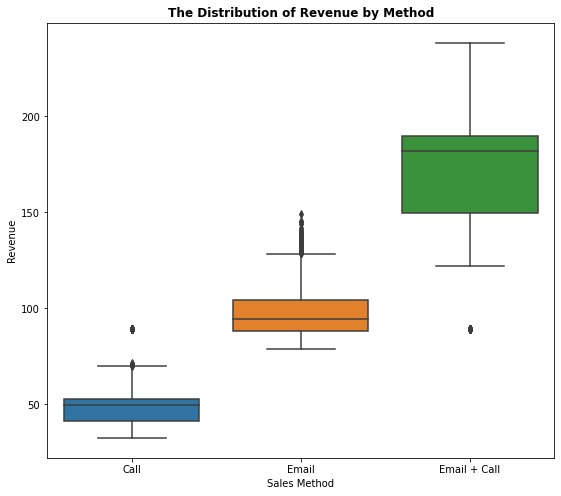

In [15]:
#Differences in revenue for each sales method approach - Revenue
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
sns.boxplot(x='sales_method', y='revenue', data=sales)
plt.title('The Distribution of Revenue by Method',fontweight='bold')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')

From this multiple box plot, we can see that the revenue generated by the Email+Call sales method is more significant than other methods. Majorly This method's revenue is in the range of 149.82 to 189.53. which is the highest compared to other methods. 
Email sales method, as the sales method most widely used by sales teams. only get revenue mostly in the 88.39 to 104.46 range.

### c. Was there any difference in revenue over time for each of the methods?

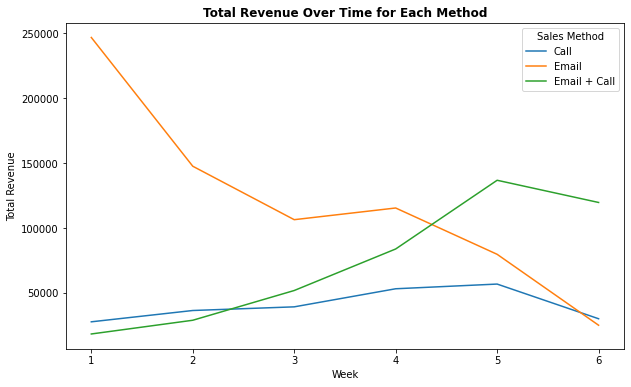

In [16]:
# Mengelompokkan data berdasarkan minggu dan sales_method, kemudian mengambil total pendapatan
revenue_by_week = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Menggunakan lineplot dari seaborn dengan total pendapatan
sns.lineplot(x='week', y='revenue', hue='sales_method', data=revenue_by_week, ci=None)

plt.title('Total Revenue Over Time for Each Method', fontweight='bold')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method', loc='upper right')

plt.show()

From this line chart, it can be seen that the total revenue resulting from the Email+Call sales method tends to increase. We can also see that total revenue via email sales method tends to decrease, and total revenue via call sales method shows no significant changes each week.

### d. What is the average revenue for each sales method in the last 6 weeks?

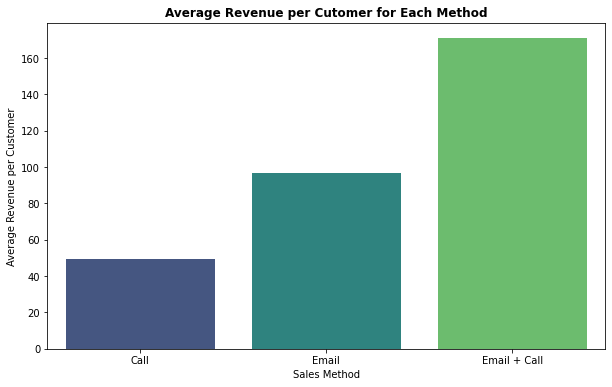

In [17]:
# Menghitung rata-rata pendapatan untuk setiap metode
average_revenue_by_method = sales.groupby('sales_method')['revenue'].mean().reset_index()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='revenue', data=average_revenue_by_method, palette='viridis')
plt.title('Average Revenue per Cutomer for Each Method',fontweight='bold')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue per Customer')
plt.show()

From this bar chart graph, it can be seen that the highest average revenue per customer was achieved by the Email+Call sales method, namely 170.88 per customer.
It can be concluded that the email+call method is the most effective for achieving good revenue


## Business Metrics

Given the launch of a new product in office stationery six weeks ago, our focus is to ensure that we use the best techniques to sell new products effectively. I recommend we use **the average revenue per customer last six weeks** to measure the success of a sales strategy as a key metric.

Based on data from the last 6 weeks, the analysis results show the highest average revenue per customer of 170.88 was achieved through the Email + Call sales method. Therefore, if this number increases in the next 6 weeks, it bodes well for achieving our goals

## Recommendation

For the following weeks, I would recommend we can focus on the following steps:

- Using key metrics to monitor whether there is a strong sign to see the revenue per customer will increase.
- To implement the sales strategy, I recommend prioritizing the Call+Email method as the main focus for your upcoming sales strategy. because this method provides the highest average revenue per customer, and has a total revenue that tends to increase over time. 